**Práctica 12: Análisis de texto con nltk y wordcloud**

Esta práctica inicia con [procesamiento con scripts de shell](https://elisa.dyndns-web.com/teaching/comp/datasci/p12.html); lo que viene en esta hoja de Jupyter es la continuación de ese trabajo.

Lo mero primero en esta segunda fase es limpiar el texto para que palabras estén en su versión base (por ejemplo, que singulares y plurales aparezcan como una misma palabra (inglés: stemming) y que palabras "de relleno" (inglés: stop words) como artículos y preposiciones se eliminen. Vamos a usar la librería nltk (natural language tool kit) de python, cargando los archivos de datos desde la web para poder procesarlos en jupyter.

Primero hay que instalar nltk y descargar vocabularios.

In [40]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("spanish")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to /Users/elisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/elisa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/elisa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


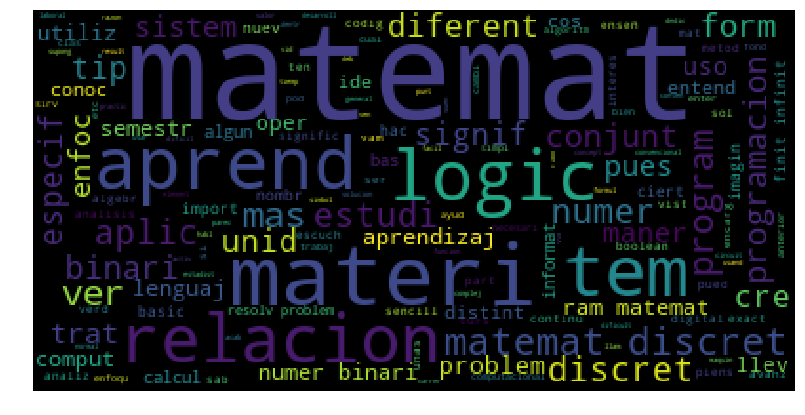

In [39]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ini.txt", header = None)
d.columns = ['resp', 'CF1op', 'CF2op', 'tipo']
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.resp[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

OK, esos son las respuestas de todos los que contestaron la primera encuesta. Vamos a crear gráficas distintas para los tipos A, B y C y además comparar entre las tres encuestas.

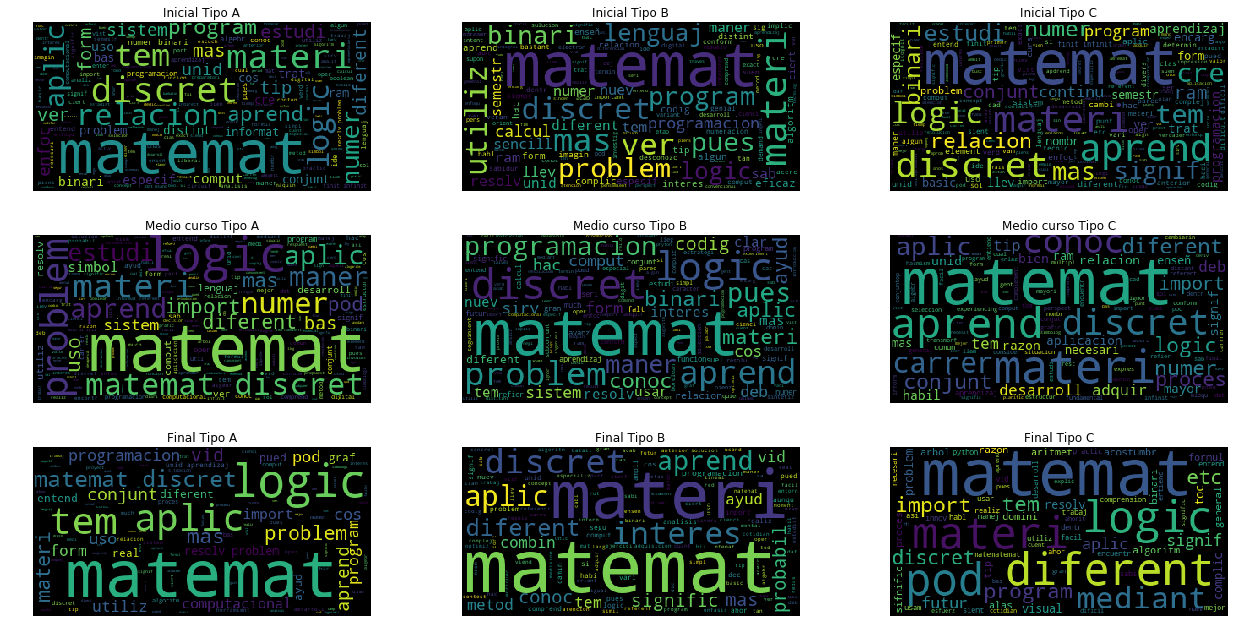

In [28]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ini.txt", header = None)
dmcu = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_mcu.txt", header = None)
dord = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ord.txt", header = None)
cols = ['resp', 'CF1op', 'CF2op', 'tipo']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Inicial", "Medio curso", "Final"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.resp[r]
        reemplazo = ''
        if original != 'SIN_DESCR':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in "ABC":
        sf = plt.subplot(3, 3, i)
        i += 1
        sf.set_title(lbl + ' Tipo ' + tipo)
        incl = d.loc[d.tipo == 'tipo' + tipo]
        nube = WordCloud().generate(' '.join(incl.limpios))
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

La raza parece estar repitiendo el nombre de la unidad de aprendizaje. Mejor agreguemos unos stop words nuestros para ver qué queda si no usamos las palabras "matemáticas discretas" ni "tema" ni "materia". A mi juicio, "pues" debería ser un stop word también y "mediante" es esencialmente una preposición. La palabra "más" tampoco contribuye gran cosa.

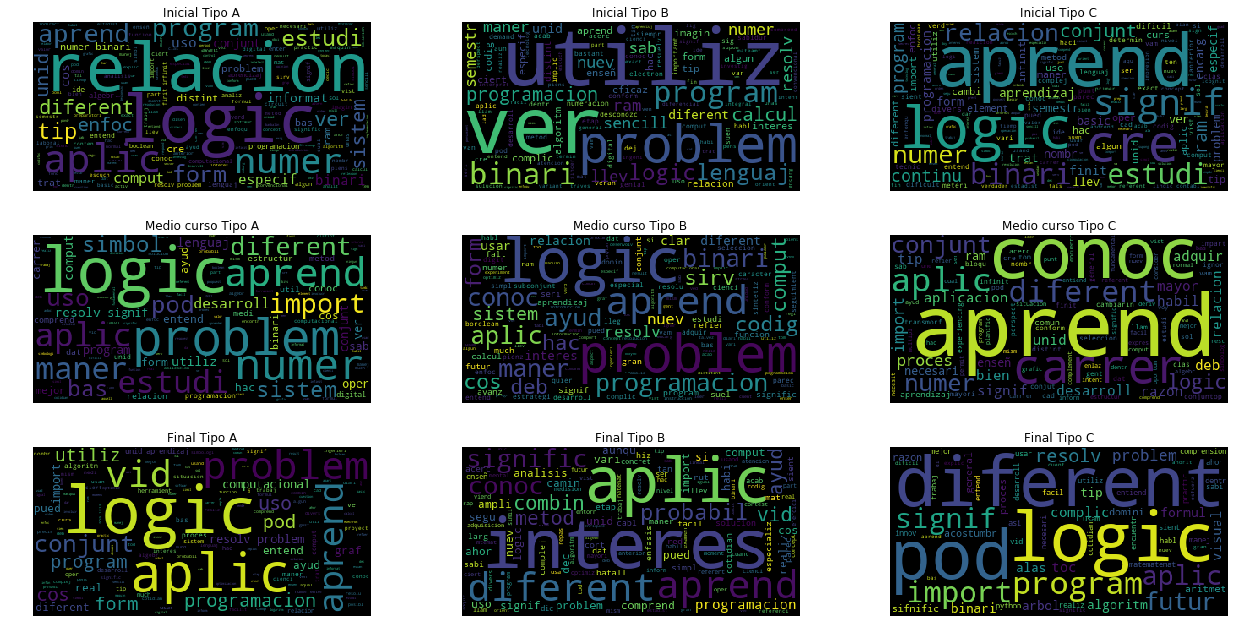

In [33]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

adicionales = ['matemat', 'discret', 'pues', 'mediant', 'etc', 'mas', 'materi', 'tem']

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ini.txt", header = None)
dmcu = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_mcu.txt", header = None)
dord = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ord.txt", header = None)
cols = ['resp', 'CF1op', 'CF2op', 'tipo']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("spanish") 
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Inicial", "Medio curso", "Final"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.resp[r]
        reemplazo = ''
        if original != 'SIN_DESCR':
            inicial = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            quedar = [p for p in inicial if p not in adicionales]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in "ABC":
        sf = plt.subplot(3, 3, i)
        i += 1
        sf.set_title(lbl + ' Tipo ' + tipo)
        incl = d.loc[d.tipo == 'tipo' + tipo]
        nube = WordCloud().generate(' '.join(incl.limpios))
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

Hay varias respuestas tipo "no sé", pero como son ambos stop words, no se notan. 

* "La verdad no se nunca la habia escuchado"
* "pues la verdad no se me imagino que por tener el nombre de discretas sera algo diferente a las matematicas que normalmente aplicamos"
* "Realmente no tengo idea"
* "no tengo idea de lo que tratará la materia intenté investigando un poco pero no terminé de comprender"
* "La verdad no tengo idea pero se que vamos a trabajar con muchos números como en todas las ramas de las matematicas"

Como lo de análisis de sentimiento no sirve en español, simplificamos y checamos simplemente cuáles respuestas contienen la palabra "no" con bash aunque no son todos negación de conocimiento. Por ejemplo, "Que matematicas discretas no son continuas" es una definición completamente válida de las matemáticas discretas.

Regresemos a usar [un script de shell](https://github.com/satuelisa/DataScience/blob/master/bash/p12_6.sh).

INI
24
materia en la cual utilizamos numeros pero que no es tan complicada ,61,71,tipoB
matematicas de elementos que se encargan de elementos contables logicos; y no matematicas de continuidad o cambio continuo.,14,NA2da,tipoC
Aun no lo se.,69,NP,tipoB
Es obvio que es una rama de la matematicas sin embargo no estoy del todo enterado de que trata por eso omito mi opinion,79,NA2da,tipoA
La materia no se muy bien de qué trata exactamente pero debido a amigos que ya llevaron esta materia se que es una forma de entender la programación y saber cómo usar la lógica.,70,NA2da,tipoA
La verdad no tengo idea pero se que vamos a trabajar con muchos números como en todas las ramas de las matematicas .,81,NA2da,tipoA
Matematicas discretas creo que significa las matematicas que no se ven a simple vista.,84,NA2da,tipoA
Matematicas que no se ven a simple vista,53,NA2da,tipoC
no tengo idea de lo que tratará la materia intenté investigando un poco pero no terminé de comprender,53,NP,tipoB
No tengo ni idea espero que esto cambie en el transcurso del semestre si es que no me acobardó y la doy de baja.,78,NA2da,tipoA
Piendo que no cambia porque seguimos haciendo lo mismo que hace años,36,NA2da,tipoC
pues no tengo una idea muy especifica pero creo que es sobre la continuidad de los numeros en las matematicas,19,NA2da,tipoC
Que puedo llegar a aprender algo que no conozco,54,66,tipoD
Realmente no tengo idea,72,NA2da,tipoA
significa para mi unas matematicas mas avanzadas pero no parecidas a las demas,73,NA2da,tipoA
sinceramente no habia escuchado sobre matematicas discretas pero me llama la atención saber sobre la unidad.,69,79,tipoB
La verdad no sabria explicar muy bien pero imagino que es sobre programacion,82,NA2da,tipoA
La verdad no se nunca la habia escuchado,68,NA2da,tipoC
Matemáticas que casi no se notan,68,NA2da,tipoC
Es una rama de las matemáticas pero fuera de eso la verdad no logro sacar nada más del nombre.,19,NA2da,tipoC
pues la verdad no se me imagino que por tener el nombre de discretas sera algo diferente a las matematicas que normalmente aplicamos ,75,NA2da,tipoA
al escuchar mates discretas no me imagine necesitar computadora.,92,NA2da,tipoA
Matemáticas Discretas Matemáticas que son mas de razonamiento y no de tantas operaciones,31,NA2da,tipoC
para ver de otra manera las matemáticas no solo en problemas,0,NA2da,tipoC
  10 tipoA
   4 tipoB
   9 tipoC
   1 tipoD

MCU
9
Para mi; el nombre podria hacer referencia a la parte de las matematicas que la mayoria de la gente no llega a conocer pero si usa a diario sin saberlo,71,NA2da,tipoA
la vedad no lo tengo claro,53,NP,tipoB
La otra cara de las matemáticas; lo que casi nadie conoce más sin embargo no menos importante,72,NA2da,tipoA
son matematicas usadas de forma no comun,71,NA2da,tipoA
matematicas discretas nos da una expancion de las matematicas asi pudiendo aplicarlas mas facilmente o para otras cosas que no crei poder usar,78,NA2da,tipoA
Realmente no se una aplicacion de esta pero se que esta desarrollando una habilidad para resolver problas mas rapido y de forma distinta haciendome pensar de una manera diferente,72,NA2da,tipoA
Pues interesante ya que no son las matemáticas que me imaginaba ,56,66,tipoD
Desarrollo matemático en base a simbologías no comunes con aplicaciones más comunes,64,NA2da,tipoC
Pues que se refiere a las matematicas que no se suelen ver comunmente y la gente las suele ignorar y por eso mismo pienso que por eso se refiere a la palabra discretas.,68,70,tipoB
   5 tipoA
   2 tipoB
   1 tipoC
   1 tipoD

ORD
13
Que matematicas discretas no son continuas; entonces hay intervalos y saltos en la información,84,NA2da,tipoA
Matemáticas aplicadas a problemas no algebráicos y programación,91,NA2da,tipoA
Para mi el nombre de la unidad de aprendizaje significa; un sin fin de formas de combinar; acomodar y conecta cualquier cosas que tengan relaciona; incluso aun que no tengan relación.   ,70,NA2da,tipoA
ahora tiene un amplio significado pues; no sabia que las matematicas discretas tuviesen usos tan importantes,63,77,tipoB
ahora comprendo mas el énfasis de la materia; que en si es para el análisis de datos que no son muy concretos que pueden ser muy como la materia lo dice discretos por lo que los métodos de enseñanza y de análisis de esta materia nos ayudaran,69,80,tipoB
Son aquellas matematicas que no se ven que van implementandas en procesos de optimizacion y programacion y por ende nunca las veras por eso el nombre de discretas,83,NA2da,tipoA
Creo que son los tipos de algoritmos en mátematicas que están pero no les tomamos tanta relevancía como otros temas.,82,NA2da,tipoA
Calculos de matematicos analogicos por discretas se ha de referir a simples o no muy directos por asi decirlo; ocultos talvez,72,NA2da,tipoA
Que te ayuda para abrir mas la mente en problemas no comunes ,71,NA2da,tipoA
Matemáticas donde todo es lógica y no esta difícil solo es entender los símbolos y entender como se lee todo el contenido,58,63,tipoD
que las matematicas discretas son mas de operadores logicos utilizar operadores que en las matematicas tradicionales no se usan.,74,NA2da,tipoA
para mi siento que significa que es una materia muy practica para usar y facil de entender ya que usamos python y ese programa no sabia manejarlo ahora ya le entiendo mucho mejor ,62,NA2da,tipoC
matematicas las cuales no presumen su pedro por que avarcan todo,71,NA2da,tipoA
   9 tipoA
   2 tipoB
   1 tipoC
   1 tipoD

Pinta que los que terminan pasando en primera oportunidad son más propensos de
1. contestar la pregunta
2. confesar si no saben qué es

Además se nota que las respuestas contienen errores de ortografía. En inglés lo podríamos corregir dentro de python con autocorrect:

In [43]:
from autocorrect import spell

print(spell('stocastic'))
print(spell('forcasting'))

stochastic
forecasting


pero en otros idiomas necesitamos usar pyspellchecker:

In [48]:
from spellchecker import SpellChecker
sc = SpellChecker(language='es') # cargamos el diccionario para español

entrada = 'sifnifica poder pensar de manera logica y aplicar los diferentes metodos enla vida diaria'
palabras = entrada.split()
print("OK:", ' '.join(sc.known(palabras)))

for p in sc.unknown(palabras):
    print(p, '->', sc.correction(p))

OK: vida enla y aplicar diaria de poder pensar metodos los logica diferentes manera
sifnifica -> significa


No se dió cuenta de lo de "enla" que ocuparía ser "en la".

Incorporemos esto en una última versión de los nubes de conceptos. Va a ser _mucho más lento_ que antes con la introducción de revisión de ortografía, por lo cual no lo pongo para todos los casos sino solamente para la encuesta final de tipo C donde alguién escribió "sifinifica".

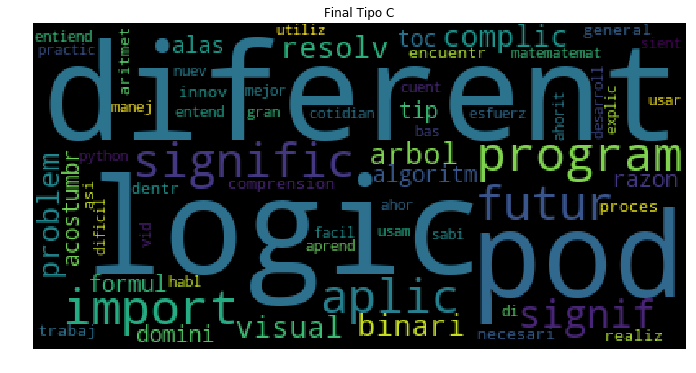

In [60]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
sc = SpellChecker(language='es')

adicionales = ['matemat', 'discret', 'pues', 'mediant', 'etc', 'mas', 'materi', 'tem', 'tipo']

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ord.txt", header = None)
d.columns = ['resp', 'CF1op', 'CF2op', 'tipo']
d = d.loc[d.tipo == 'tipoC'] # filtamos desde un principio para ahorrar tiempo
d = d.loc[d.resp != 'SIN_DESCR'] 
spa = stopwords.words("spanish") 
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.resp:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    inicial = [stemmer.stem(p) for p in revisadas if p.lower() not in spa]
    quedar = [p for p in inicial if p not in adicionales]
    texto += ' '.join(quedar) + ' '
plt.title('Final Tipo C')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()

"matematemat"... ni modo. Si uno quiere palabras de verdad en el nube en lugar de las versiones que salieron del stemming, se podría reemplazar a cada forma base con su forma original más frequente, llevando un registro de los reemplazos en un diccionario.

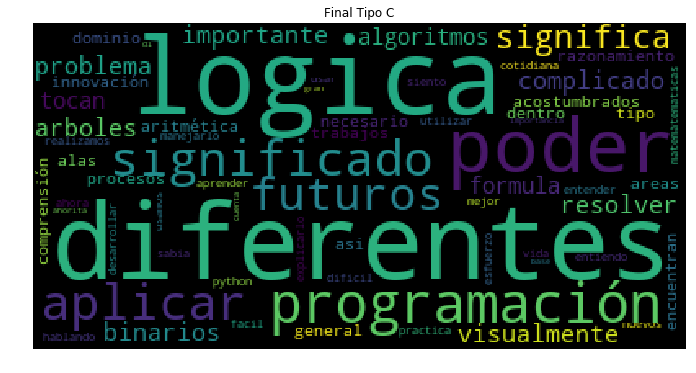

In [61]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
from collections import defaultdict

sustituciones = defaultdict(set)
frecuencias = defaultdict(int)
reemplazos = dict()
representantes = dict()

sc = SpellChecker(language='es')
adicionales = ['matemat', 'discret', 'pues', 'mediant', 'etc', 'mas', 'materi', 'tem', 'tipo']

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ord.txt", header = None)
d.columns = ['resp', 'CF1op', 'CF2op', 'tipo']
d = d.loc[d.tipo == 'tipoC'] # filtamos desde un principio para ahorrar tiempo
d = d.loc[d.resp != 'SIN_DESCR'] 
spa = stopwords.words("spanish") 
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.resp:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    quedar = []
    for p in revisadas:
        p = p.lower()
        if p not in spa: 
            rp = stemmer.stem(p) 
            if rp not in adicionales:
                reemplazos[p] = rp
                sustituciones[rp].add(p)
                frecuencias[p] += 1
                quedar.append(p)
    for p in quedar:
        agregar = p
        if p in frecuencias:
            if p not in representantes:
                mayor = 0
                cand = None
                grupo = sustituciones[reemplazos[p]]
                for gp in grupo:
                    f = frecuencias[gp]
                    if f > mayor:
                        cand = gp
                        mayor = f
                for gp in grupo:
                    representantes[gp] = cand
            agregar = representantes[p]
        texto += agregar + " "
plt.title('Final Tipo C')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()

Al parecer los alumnos no saben que "lógica" o "árboles" llevan acento y la corrección de ortografía tampoco sabe.

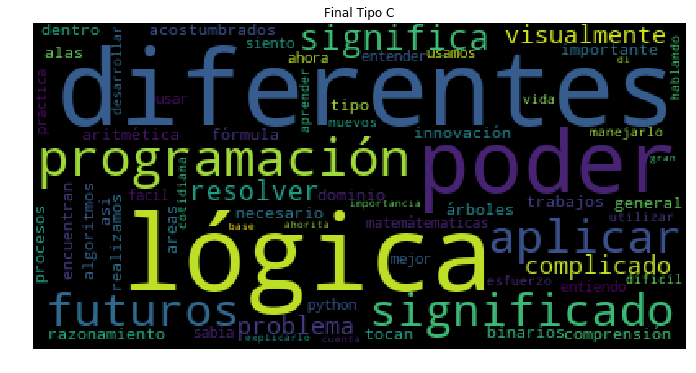

In [63]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
from collections import defaultdict

sustituciones = defaultdict(set)
frecuencias = defaultdict(int)
reemplazos = dict()
representantes = dict()

sc = SpellChecker(language='es')
adicionales = ['matemat', 'discret', 'pues', 'mediant', 'etc', 'mas', 'materi', 'tem', 'tipo']
bruteforce = {"arboles": "árboles", "logica": "lógica", "formula": "fórmula"}

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/signif_ord.txt", header = None)
d.columns = ['resp', 'CF1op', 'CF2op', 'tipo']
d = d.loc[d.tipo == 'tipoC'] # filtamos desde un principio para ahorrar tiempo
d = d.loc[d.resp != 'SIN_DESCR'] 
spa = stopwords.words("spanish") 
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.resp:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    quedar = []
    for p in revisadas:
        p = p.lower()
        if p not in spa: 
            rp = stemmer.stem(p) 
            if rp not in adicionales:
                reemplazos[p] = rp
                sustituciones[rp].add(p)
                frecuencias[p] += 1
                quedar.append(p)
    for p in quedar:
        agregar = p
        if p in frecuencias:
            if p not in representantes:
                mayor = 0
                cand = None
                grupo = sustituciones[reemplazos[p]]
                for gp in grupo:
                    f = frecuencias[gp]
                    if f > mayor:
                        cand = gp
                        mayor = f
                for gp in grupo:
                    representantes[gp] = cand
            agregar = representantes[p]
        if agregar in bruteforce:
            agregar = bruteforce[agregar]
        texto += agregar + " "
plt.title('Final Tipo C')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()

Anyhow, en el penúltimo reporte de las prácticas, usa o nltk o sklearn o alguna otra librería de python disponible vía pip3 para algún tipo de análisis de texto, apoyándote en las herramientas de bash para preprocesamiento. Reporta los resultados con cuadros, gráficas y/o extractos de texto. Si tu caso de estudio de plano no contiene información textual, agarra algún otro repositorio para practicar aparte en orden de completar el reporte.